# Deep Learning Cloud Service Provider Comparison
## By Jeff Hale

In this notebook I explore which cloud service providers offer the best value for GPU users. I use plotly, Seaborn, and pandas to make visualizations for this project.

## See [this Medium article](https://towardsdatascience.com/maximize-your-gpu-dollars-a9133f4e546a) for an extended discussion.

In [1]:
# import the usual frameworks
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import collections
import warnings

from IPython.core.display import display, HTML
from sklearn.preprocessing import MinMaxScaler
    
# import plotly 
import plotly
import plotly.figure_factory as ff
import plotly.graph_objs as go
import plotly.offline as py
import plotly.tools as tls

# for color scales in plotly
import colorlover as cl 

# configure things
warnings.filterwarnings('ignore')

pd.options.display.float_format = '{:,.2f}'.format  
pd.options.display.max_columns = 999

py.init_notebook_mode(connected=True)

%load_ext autoreload
%autoreload 2
%matplotlib inline

# Please upvote this Kaggle kernel if you find it helpful.

# Get the data

List package versions and read in the data from the .csv. 

In [2]:
# !pwd
# !pip list

In [3]:
df_orig = pd.read_csv(
    '../input/clouds.csv',
    skiprows=0,
    thousands=',',
)
df_orig

,Cloud Service,NVIDIA GPU,CPUs,GPU RAM,CPU RAM,Cost Per Hour,Wall Time,Cost to Train
0,Google Colab,K80,1,12.00,13,0.00,31.17,0.00
1,Google Cloud Compute Engine,P100,6,16.00,20,0.50,5.32,0.04
2,Google Cloud Compute Engine,K80,6,12.00,17,0.20,18.13,0.06
3,Google Cloud Compute Engine,V100,8,16.00,20,0.82,3.83,0.05
4,Google Cloud Compute Engine,P4,4,8.00,26,0.33,10.28,0.06
5,Google Cloud Compute Engine,V100 x 2,8,32.00,30,1.57,3.63,0.10
6,Google Cloud Compute Engine,V100 x 4,8,64.00,30,3.05,3.38,0.17
7,AWS EC2,K80 (p2.xlarge),4,12.00,61,0.28,20.90,0.10
8,AWS EC2,K80 x 8 (p2.8xlarge),32,96.00,488,2.35,16.12,0.63
9,AWS EC2,V100 (p3.2xlarge),8,16.00,61,1.05,3.85,0.07


In [4]:
df = df_orig.copy()

In [5]:
df

,Cloud Service,NVIDIA GPU,CPUs,GPU RAM,CPU RAM,Cost Per Hour,Wall Time,Cost to Train
0,Google Colab,K80,1,12.00,13,0.00,31.17,0.00
1,Google Cloud Compute Engine,P100,6,16.00,20,0.50,5.32,0.04
2,Google Cloud Compute Engine,K80,6,12.00,17,0.20,18.13,0.06
3,Google Cloud Compute Engine,V100,8,16.00,20,0.82,3.83,0.05
4,Google Cloud Compute Engine,P4,4,8.00,26,0.33,10.28,0.06
5,Google Cloud Compute Engine,V100 x 2,8,32.00,30,1.57,3.63,0.10
6,Google Cloud Compute Engine,V100 x 4,8,64.00,30,3.05,3.38,0.17
7,AWS EC2,K80 (p2.xlarge),4,12.00,61,0.28,20.90,0.10
8,AWS EC2,K80 x 8 (p2.8xlarge),32,96.00,488,2.35,16.12,0.63
9,AWS EC2,V100 (p3.2xlarge),8,16.00,61,1.05,3.85,0.07


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15 entries, 0 to 14
Data columns (total 8 columns):
Cloud Service    15 non-null object
NVIDIA GPU       15 non-null object
CPUs             15 non-null int64
GPU RAM          15 non-null float64
CPU RAM          15 non-null int64
Cost Per Hour    15 non-null float64
Wall Time        14 non-null float64
Cost to Train    15 non-null float64
dtypes: float64(4), int64(2), object(2)
memory usage: 1.0+ KB


Amazon Sagemaker was not run while Amazon sits on my quota increase request. The specs of machine on Sagemaker are the same as a similar on AWS EC2, so that EC2 time was substituded. Sagemaker is very expensive for the power, so it's not going to make the final cut, anyway. \

Wall time was used in the analysis because that is what Colab would output for %%time. 

Let's combine the first two columns into a separate column for ease of charting.  Then we'll set the new column as the index.

In [7]:
df['full'] = df['Cloud Service'] + " " + df['NVIDIA GPU']
df.head(3)

,Cloud Service,NVIDIA GPU,CPUs,GPU RAM,CPU RAM,Cost Per Hour,Wall Time,Cost to Train,full
0,Google Colab,K80,1,12.00,13,0.00,31.17,0.00,Google Colab K80
1,Google Cloud Compute Engine,P100,6,16.00,20,0.50,5.32,0.04,Google Cloud Compute Engine P100
2,Google Cloud Compute Engine,K80,6,12.00,17,0.20,18.13,0.06,Google Cloud Compute Engine K80


In [8]:
df.set_index('full', inplace = True)
df

,Cloud Service,NVIDIA GPU,CPUs,GPU RAM,CPU RAM,Cost Per Hour,Wall Time,Cost to Train
full,,,,,,,,
Google Colab K80,Google Colab,K80,1,12.00,13,0.00,31.17,0.00
Google Cloud Compute Engine P100,Google Cloud Compute Engine,P100,6,16.00,20,0.50,5.32,0.04
Google Cloud Compute Engine K80,Google Cloud Compute Engine,K80,6,12.00,17,0.20,18.13,0.06
Google Cloud Compute Engine V100,Google Cloud Compute Engine,V100,8,16.00,20,0.82,3.83,0.05
Google Cloud Compute Engine P4,Google Cloud Compute Engine,P4,4,8.00,26,0.33,10.28,0.06
Google Cloud Compute Engine V100 x 2,Google Cloud Compute Engine,V100 x 2,8,32.00,30,1.57,3.63,0.10
Google Cloud Compute Engine V100 x 4,Google Cloud Compute Engine,V100 x 4,8,64.00,30,3.05,3.38,0.17
AWS EC2 K80 (p2.xlarge),AWS EC2,K80 (p2.xlarge),4,12.00,61,0.28,20.90,0.10
AWS EC2 K80 x 8 (p2.8xlarge),AWS EC2,K80 x 8 (p2.8xlarge),32,96.00,488,2.35,16.12,0.63


Note that Kaggle wasn't included because at the time this research was conducted using FastAI v1 with it was difficult, if not impossible. 

In [9]:
df.drop('Kaggle K80', inplace = True)
df

,Cloud Service,NVIDIA GPU,CPUs,GPU RAM,CPU RAM,Cost Per Hour,Wall Time,Cost to Train
full,,,,,,,,
Google Colab K80,Google Colab,K80,1,12.00,13,0.00,31.17,0.00
Google Cloud Compute Engine P100,Google Cloud Compute Engine,P100,6,16.00,20,0.50,5.32,0.04
Google Cloud Compute Engine K80,Google Cloud Compute Engine,K80,6,12.00,17,0.20,18.13,0.06
Google Cloud Compute Engine V100,Google Cloud Compute Engine,V100,8,16.00,20,0.82,3.83,0.05
Google Cloud Compute Engine P4,Google Cloud Compute Engine,P4,4,8.00,26,0.33,10.28,0.06
Google Cloud Compute Engine V100 x 2,Google Cloud Compute Engine,V100 x 2,8,32.00,30,1.57,3.63,0.10
Google Cloud Compute Engine V100 x 4,Google Cloud Compute Engine,V100 x 4,8,64.00,30,3.05,3.38,0.17
AWS EC2 K80 (p2.xlarge),AWS EC2,K80 (p2.xlarge),4,12.00,61,0.28,20.90,0.10
AWS EC2 K80 x 8 (p2.8xlarge),AWS EC2,K80 x 8 (p2.8xlarge),32,96.00,488,2.35,16.12,0.63


# Cost to Train
Sort by cost to train.

In [10]:
df = df.sort_values(by = ['Cost to Train'])
df.head(5)

,Cloud Service,NVIDIA GPU,CPUs,GPU RAM,CPU RAM,Cost Per Hour,Wall Time,Cost to Train
full,,,,,,,,
Google Colab K80,Google Colab,K80,1,12.00,13,0.00,31.17,0.00
vast.ai GTX 1070 Ti,vast.ai,GTX 1070 Ti,4,8.10,16,0.06,7.23,0.01
Google Cloud Compute Engine P100,Google Cloud Compute Engine,P100,6,16.00,20,0.50,5.32,0.04
Google Cloud Compute Engine V100,Google Cloud Compute Engine,V100,8,16.00,20,0.82,3.83,0.05
Google Cloud Compute Engine P4,Google Cloud Compute Engine,P4,4,8.00,26,0.33,10.28,0.06


Let's make our first chart in Plotly. Let's chart the cost to train.

In [11]:
cmax=200
cmin=50
color_s = np.linspace(cmin, cmax, 13)

data = [
    go.Bar(
        x=df.index,          
        y=df['Cost to Train'],
        marker=dict(
            colorscale='Jet',
            color=color_s,
        ),
    )
]

layout = {
    'title': 'Cost to Train',
    'xaxis': {'title': 'Cloud Software', 'tickmode': 'linear'},
    'yaxis': {'title': "$ USD"}
}

fig = go.Figure(data=data, layout=layout)
py.iplot(fig)

Let's see how the chart looks if we take off the two non-competitive AWS instances.

In [12]:
df = df.iloc[:-2]
df

,Cloud Service,NVIDIA GPU,CPUs,GPU RAM,CPU RAM,Cost Per Hour,Wall Time,Cost to Train
full,,,,,,,,
Google Colab K80,Google Colab,K80,1,12.00,13,0.00,31.17,0.00
vast.ai GTX 1070 Ti,vast.ai,GTX 1070 Ti,4,8.10,16,0.06,7.23,0.01
Google Cloud Compute Engine P100,Google Cloud Compute Engine,P100,6,16.00,20,0.50,5.32,0.04
Google Cloud Compute Engine V100,Google Cloud Compute Engine,V100,8,16.00,20,0.82,3.83,0.05
Google Cloud Compute Engine P4,Google Cloud Compute Engine,P4,4,8.00,26,0.33,10.28,0.06
Google Cloud Compute Engine K80,Google Cloud Compute Engine,K80,6,12.00,17,0.20,18.13,0.06
AWS EC2 V100 (p3.2xlarge),AWS EC2,V100 (p3.2xlarge),8,16.00,61,1.05,3.85,0.07
Paperspace Quadro M4000,Paperspace,Quadro M4000,8,8.00,30,0.51,8.30,0.07
Google Cloud Compute Engine V100 x 2,Google Cloud Compute Engine,V100 x 2,8,32.00,30,1.57,3.63,0.10


We neeed some shorter labels.

In [13]:
labs = [
    'Google Colab K80',
    'vast.ai GTX1070Ti',
    'GCP P100',
    'GCP V100',
    'GCP P4',
    'GCP K80',
    'AWS EC2 V100',
    'Paperspace M4000',
    'GCP V100 x2',
    'AWS EC2 K80',
    'GCP V100 x4',
    'AWS EC2 V100 x4',
]

len(labs)

12

In [14]:
df['short_names'] = labs
df

,Cloud Service,NVIDIA GPU,CPUs,GPU RAM,CPU RAM,Cost Per Hour,Wall Time,Cost to Train,short_names
full,,,,,,,,,
Google Colab K80,Google Colab,K80,1,12.00,13,0.00,31.17,0.00,Google Colab K80
vast.ai GTX 1070 Ti,vast.ai,GTX 1070 Ti,4,8.10,16,0.06,7.23,0.01,vast.ai GTX1070Ti
Google Cloud Compute Engine P100,Google Cloud Compute Engine,P100,6,16.00,20,0.50,5.32,0.04,GCP P100
Google Cloud Compute Engine V100,Google Cloud Compute Engine,V100,8,16.00,20,0.82,3.83,0.05,GCP V100
Google Cloud Compute Engine P4,Google Cloud Compute Engine,P4,4,8.00,26,0.33,10.28,0.06,GCP P4
Google Cloud Compute Engine K80,Google Cloud Compute Engine,K80,6,12.00,17,0.20,18.13,0.06,GCP K80
AWS EC2 V100 (p3.2xlarge),AWS EC2,V100 (p3.2xlarge),8,16.00,61,1.05,3.85,0.07,AWS EC2 V100
Paperspace Quadro M4000,Paperspace,Quadro M4000,8,8.00,30,0.51,8.30,0.07,Paperspace M4000
Google Cloud Compute Engine V100 x 2,Google Cloud Compute Engine,V100 x 2,8,32.00,30,1.57,3.63,0.10,GCP V100 x2


In [15]:
cmax=200
cmin=50
color_s = np.linspace(cmin, cmax, 12)

data = [
    go.Bar(
        x=df.short_names,          
        y=df['Cost to Train'],
        marker=dict(
            colorscale='Jet',
            # cauto=True,
            color=color_s,
        ),
    )
]

layout = {
    'title': 'Cost to Train',
    'xaxis': {'title': 'Cloud Software', 'tickmode': 'linear'},
    'yaxis': {'title': "$ USD"}
}

fig = go.Figure(data=data, layout=layout)
py.iplot(fig)

That looks better.

# Speed to train
Let's look at training time.

In [16]:
df = df.sort_values(by = ['Wall Time'])
df

,Cloud Service,NVIDIA GPU,CPUs,GPU RAM,CPU RAM,Cost Per Hour,Wall Time,Cost to Train,short_names
full,,,,,,,,,
AWS EC2 V100 x 4 (p3.8xlarge),AWS EC2,V100 x 4 (p3.8xlarge),64,128.00,488,4.05,2.97,0.20,AWS EC2 V100 x4
Google Cloud Compute Engine V100 x 4,Google Cloud Compute Engine,V100 x 4,8,64.00,30,3.05,3.38,0.17,GCP V100 x4
Google Cloud Compute Engine V100 x 2,Google Cloud Compute Engine,V100 x 2,8,32.00,30,1.57,3.63,0.10,GCP V100 x2
Google Cloud Compute Engine V100,Google Cloud Compute Engine,V100,8,16.00,20,0.82,3.83,0.05,GCP V100
AWS EC2 V100 (p3.2xlarge),AWS EC2,V100 (p3.2xlarge),8,16.00,61,1.05,3.85,0.07,AWS EC2 V100
Google Cloud Compute Engine P100,Google Cloud Compute Engine,P100,6,16.00,20,0.50,5.32,0.04,GCP P100
vast.ai GTX 1070 Ti,vast.ai,GTX 1070 Ti,4,8.10,16,0.06,7.23,0.01,vast.ai GTX1070Ti
Paperspace Quadro M4000,Paperspace,Quadro M4000,8,8.00,30,0.51,8.30,0.07,Paperspace M4000
Google Cloud Compute Engine P4,Google Cloud Compute Engine,P4,4,8.00,26,0.33,10.28,0.06,GCP P4


Let's make a plotly figure with the data.

In [17]:
cmax=200
cmin=50
color_s = np.linspace(cmin, cmax, 12)

data = [
    go.Bar(
        x=df.short_names,          
        y=df['Wall Time'],
        marker=dict(
            colorscale='Jet',
            color=color_s,
        ),
    )
]

layout = {
    'title': 'Time to Train',
    'xaxis': {'title': 'Cloud Software', 'tickmode': 'linear'},
    'yaxis': {'title': "Minutes"}
}

fig = go.Figure(data=data, layout=layout)
py.iplot(fig)

## Let's plot price vs speed on a scatter plot.

> Let's make a DataFrame that just contains the poinyd on the efficient frontier.

In [18]:
df_best = df.iloc[[0,1,2,4,5,6,11],:]
df_best

,Cloud Service,NVIDIA GPU,CPUs,GPU RAM,CPU RAM,Cost Per Hour,Wall Time,Cost to Train,short_names
full,,,,,,,,,
AWS EC2 V100 x 4 (p3.8xlarge),AWS EC2,V100 x 4 (p3.8xlarge),64,128.00,488,4.05,2.97,0.20,AWS EC2 V100 x4
Google Cloud Compute Engine V100 x 4,Google Cloud Compute Engine,V100 x 4,8,64.00,30,3.05,3.38,0.17,GCP V100 x4
Google Cloud Compute Engine V100 x 2,Google Cloud Compute Engine,V100 x 2,8,32.00,30,1.57,3.63,0.10,GCP V100 x2
AWS EC2 V100 (p3.2xlarge),AWS EC2,V100 (p3.2xlarge),8,16.00,61,1.05,3.85,0.07,AWS EC2 V100
Google Cloud Compute Engine P100,Google Cloud Compute Engine,P100,6,16.00,20,0.50,5.32,0.04,GCP P100
vast.ai GTX 1070 Ti,vast.ai,GTX 1070 Ti,4,8.10,16,0.06,7.23,0.01,vast.ai GTX1070Ti
Google Colab K80,Google Colab,K80,1,12.00,13,0.00,31.17,0.00,Google Colab K80


Make a subset DataFrames by cloud provider for Plotly traces.

In [27]:
df_aws = df[df['Cloud Service']=='AWS EC2']
df_aws

,Cloud Service,NVIDIA GPU,CPUs,GPU RAM,CPU RAM,Cost Per Hour,Wall Time,Cost to Train,short_names
full,,,,,,,,,
AWS EC2 V100 x 4 (p3.8xlarge),AWS EC2,V100 x 4 (p3.8xlarge),64,128.00,488,4.05,2.97,0.20,AWS EC2 V100 x4
AWS EC2 V100 (p3.2xlarge),AWS EC2,V100 (p3.2xlarge),8,16.00,61,1.05,3.85,0.07,AWS EC2 V100
AWS EC2 K80 (p2.xlarge),AWS EC2,K80 (p2.xlarge),4,12.00,61,0.28,20.90,0.10,AWS EC2 K80


In [28]:
df_gcp = df[df['Cloud Service']=='Google Cloud Compute Engine']
df_gcp

,Cloud Service,NVIDIA GPU,CPUs,GPU RAM,CPU RAM,Cost Per Hour,Wall Time,Cost to Train,short_names
full,,,,,,,,,
Google Cloud Compute Engine V100 x 4,Google Cloud Compute Engine,V100 x 4,8,64.00,30,3.05,3.38,0.17,GCP V100 x4
Google Cloud Compute Engine V100 x 2,Google Cloud Compute Engine,V100 x 2,8,32.00,30,1.57,3.63,0.10,GCP V100 x2
Google Cloud Compute Engine V100,Google Cloud Compute Engine,V100,8,16.00,20,0.82,3.83,0.05,GCP V100
Google Cloud Compute Engine P100,Google Cloud Compute Engine,P100,6,16.00,20,0.50,5.32,0.04,GCP P100
Google Cloud Compute Engine P4,Google Cloud Compute Engine,P4,4,8.00,26,0.33,10.28,0.06,GCP P4
Google Cloud Compute Engine K80,Google Cloud Compute Engine,K80,6,12.00,17,0.20,18.13,0.06,GCP K80


In [29]:
df_vast = df[df['Cloud Service']=='vast.ai']
df_vast

,Cloud Service,NVIDIA GPU,CPUs,GPU RAM,CPU RAM,Cost Per Hour,Wall Time,Cost to Train,short_names
full,,,,,,,,,
vast.ai GTX 1070 Ti,vast.ai,GTX 1070 Ti,4,8.10,16,0.06,7.23,0.01,vast.ai GTX1070Ti


In [30]:
df_colab = df[df['Cloud Service']=='Google Colab']
df_colab

,Cloud Service,NVIDIA GPU,CPUs,GPU RAM,CPU RAM,Cost Per Hour,Wall Time,Cost to Train,short_names
full,,,,,,,,,
Google Colab K80,Google Colab,K80,1,12.00,13,0.00,31.17,0.00,Google Colab K80


In [31]:
df_paper = df[df['Cloud Service']=='Paperspace']
df_paper

,Cloud Service,NVIDIA GPU,CPUs,GPU RAM,CPU RAM,Cost Per Hour,Wall Time,Cost to Train,short_names
full,,,,,,,,,
Paperspace Quadro M4000,Paperspace,Quadro M4000,8,8.00,30,0.51,8.30,0.07,Paperspace M4000


Looks good. Let's plot.

In [32]:
dot_size = 10


trace1 = go.Scatter(
    x=df_aws['Wall Time'], 
    y=df_aws['Cost Per Hour'],
    marker={'color': 'purple', 'size': dot_size}, 
    mode="markers+text",  
    text=df_aws['short_names'],
    name='AWS',
    textposition="top center",
)

# the line

trace2 = go.Scatter(
    x=df_best['Wall Time'], 
    y=df_best['Cost Per Hour'],
    marker={'color': 'yellow',}, 
    mode="lines",  
    name='Efficient Frontier',
)

trace3 = go.Scatter(
    x=df_colab['Wall Time'], 
    y=df_colab['Cost Per Hour'],
    marker={'color': 'red', 'size': dot_size}, 
    mode="markers+text",  
    text=df_colab['short_names'],
    name="Google Colab",
    textposition="top center"
)

trace4 = go.Scatter(
    x=df_paper['Wall Time'], 
    y=df_paper['Cost Per Hour'],
    marker={'color': 'green', 'size': dot_size}, 
    mode="markers+text",  
    text=df_paper['short_names'],
    name="Paperspace",
    textposition="top center"
)

trace5 = go.Scatter(
    x=df_vast['Wall Time'], 
    y=df_vast['Cost Per Hour'],
    marker={'color': 'blue', 'size': dot_size}, 
    mode="markers+text",  
    text=df_vast['short_names'],
    name="vast.ai",
    textposition="top center"
)

trace6 = go.Scatter(
    x=df_gcp['Wall Time'], 
    y=df_gcp['Cost Per Hour'],
    marker={'color': 'black', 'size': dot_size}, 
    mode="markers+text",  
    text=df_gcp.short_names,
    name="Google Cloud",
    textposition="top center"
)

                   
data=[trace1, trace3, trace4, trace5, trace6, trace2 ]
layout = go.Layout(title='Cost per Hour vs Time to Train')

fig = go.FigureWidget(data,layout)

py.iplot(fig)
fig

FigureWidget({
    'data': [{'marker': {'color': 'purple', 'size': 10},
              'mode': 'markers+text',
…

This is proving to be tricky with Plotly. Because the main purpose of this is for a Medium article wihtout 3D interactiveity let's switch to the Seaborn library and see if we can make something nicer.

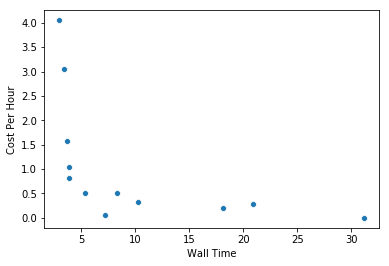

In [33]:
sns.scatterplot(data=df,x="Wall Time",y="Cost Per Hour")

Ok. That's a start. Let's see if we can improve it.

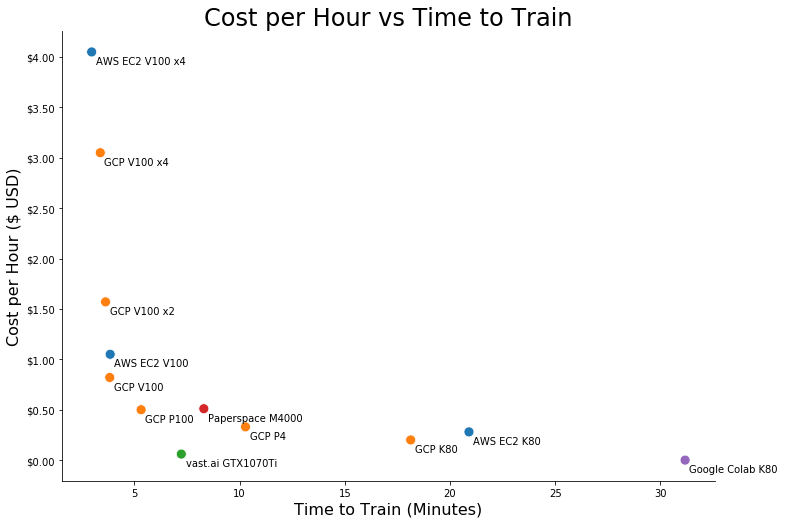

In [34]:
fig, ax = plt.subplots()

sns.scatterplot(
    data=df,
    x="Wall Time",
    y="Cost Per Hour",
    hue="Cloud Service", 
    legend=False,
    s=100,
)

for item_num in range(0,df.shape[0]):
     ax.text(
         df['Wall Time'][item_num]+0.2, 
         df['Cost Per Hour'][item_num]-0.12, 
         df['short_names'][item_num], 
     )

sns.despine()
fig.set_size_inches(11.7, 8.27)

ax.set_title('Cost per Hour vs Time to Train', fontsize=24)
# ax.legend(loc='upper right', fontsize=16,)
ax.set_xlabel('Time to Train (Minutes)',fontsize=16);
ax.set_ylabel('Cost per Hour ($ USD)',fontsize=16);

import matplotlib.ticker as mtick
fmt = '${x:,.2f}'
tick = mtick.StrMethodFormatter(fmt)
ax.yaxis.set_major_formatter(tick) 


# https://stackoverflow.com/questions/38152356/matplotlib-dollar-sign-with-thousands-comma-tick-labels

fig.savefig('cost_v_time.png')

Note that the Google Colab was run without parallelization, because of a bug in Colab's allocation of shared memory for the Docker container. This issue has since been fixed, so the time now appear to be similar to the other K80s.

## Please see [this Medium article](https://towardsdatascience.com/maximize-your-gpu-dollars-a9133f4e546a) for the full comparison and discussion. 
## Please upvote if you found this helpful, so that others can find it too :)